In [1]:
#import requried libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null valued columns

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

#### Numberical and categorical analysis 

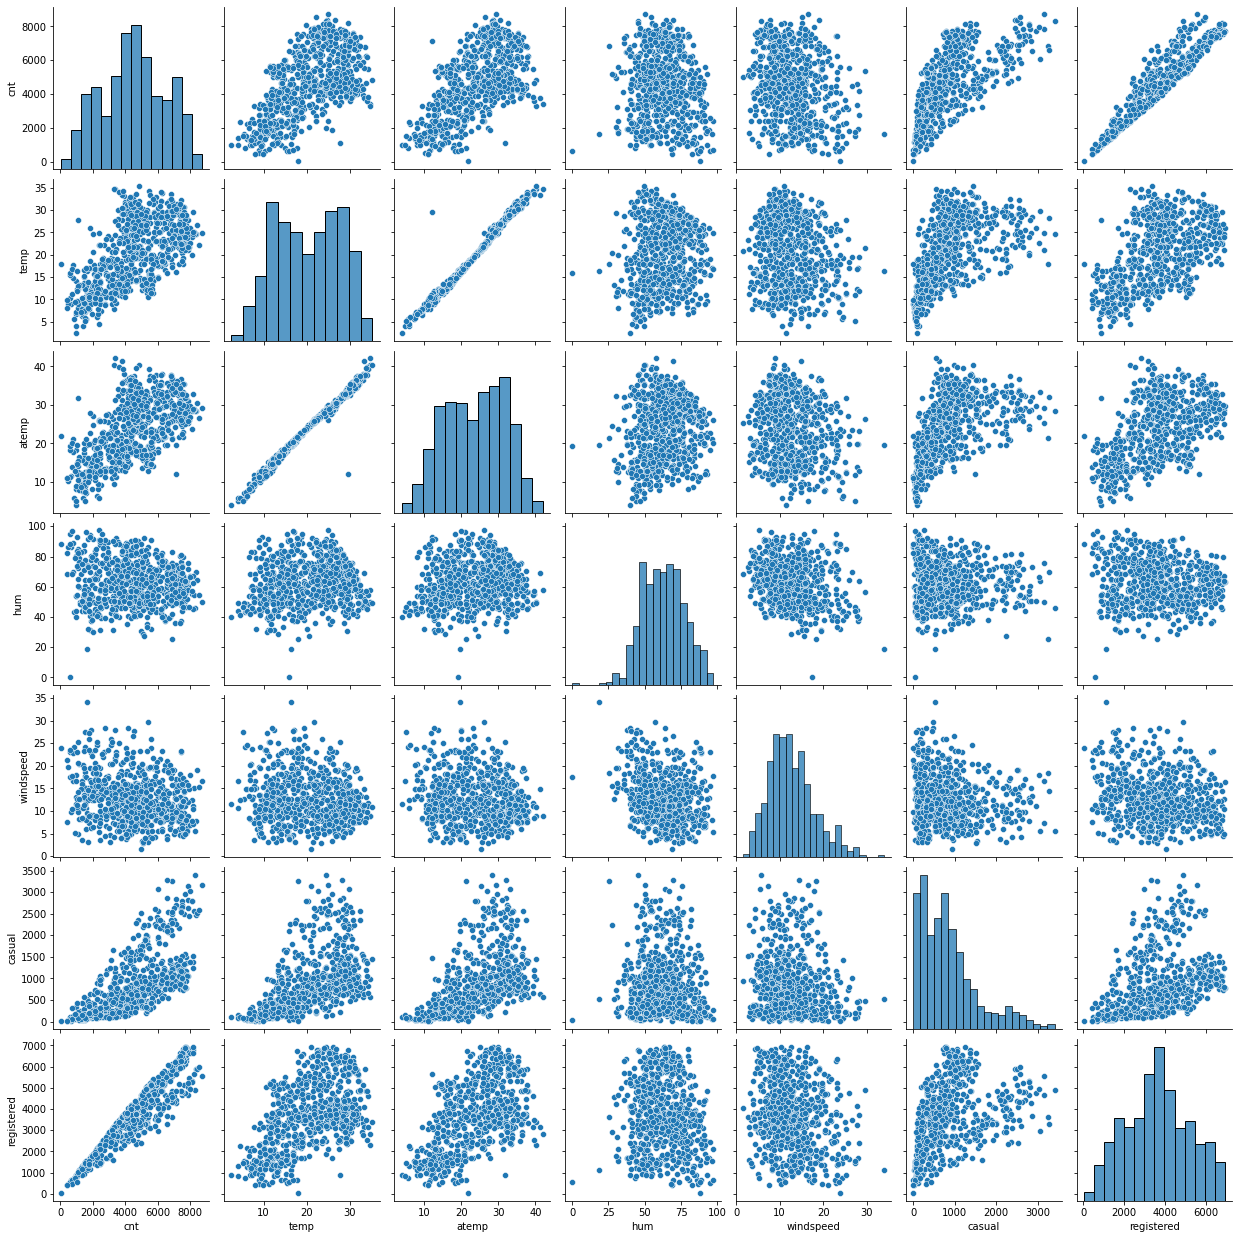

In [7]:
vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

#### Box plots for categorical values againts target value cnt

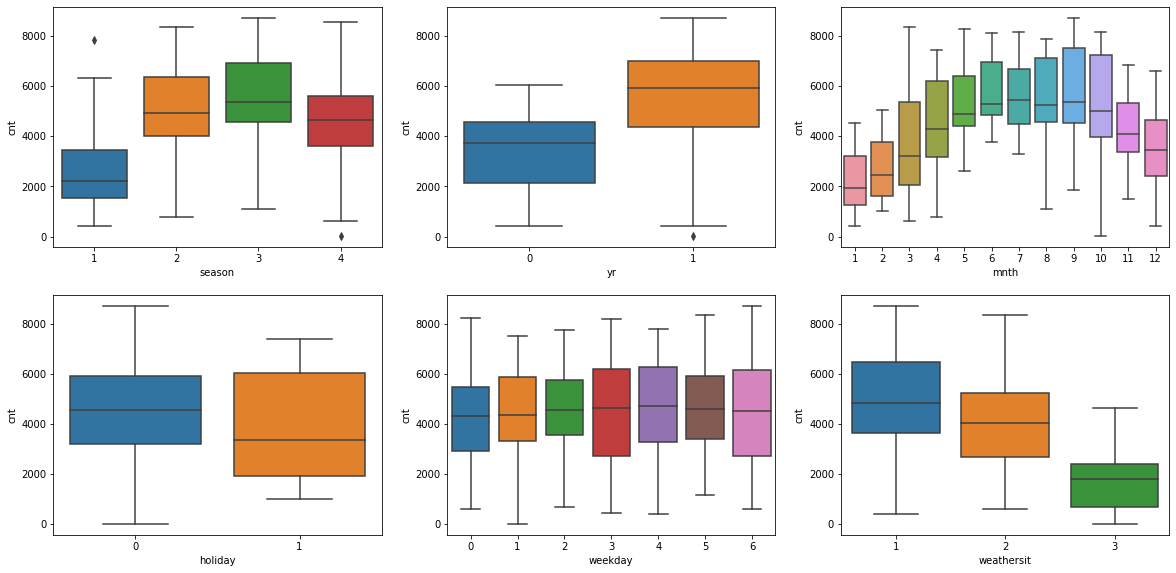

In [8]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

### Inferences from EDA 

 Season - Spring season has count when comparing with other seasons
 Year - Business increased in 2019 when compared to 2018
 Month - Positive trend in summer, winter and fall
 Holiday - On normal days users are more than holiday
 weekday - Almost same trend on weekend and weekdays
 weatherlist - User count is more on clear weather

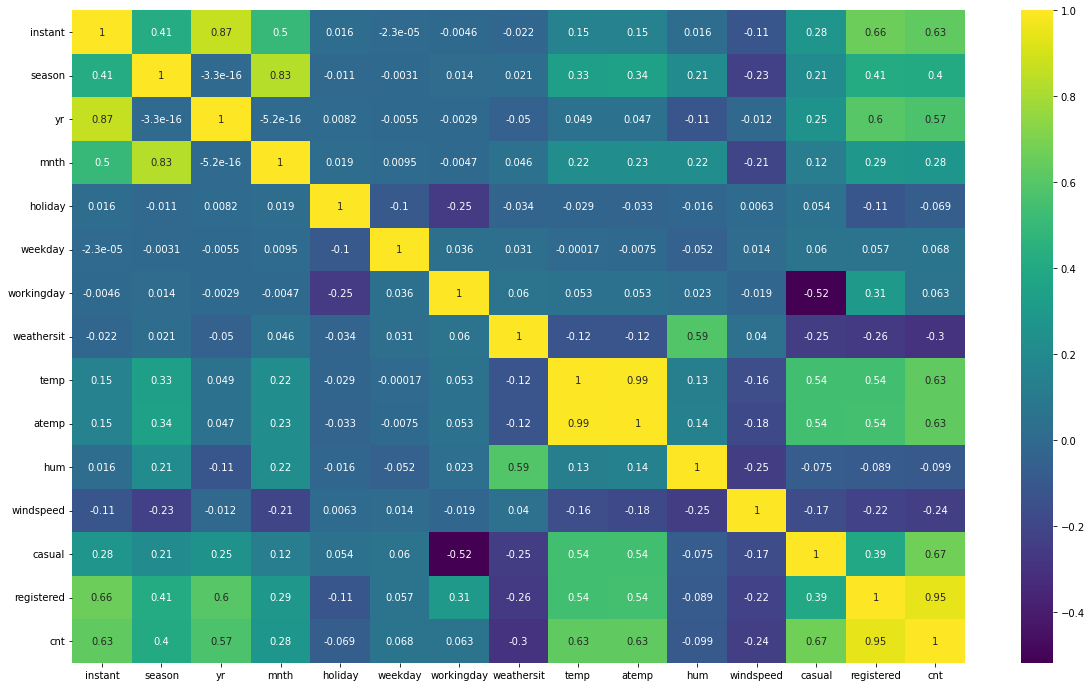

In [9]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

From the heatmap below variables are mostly corelated
- Temperature
- Season
- Month
- User Type

# Preparing Data


### Creating dummies with categorical variables

   1. season : 1:spring, 2:summer, 3:fall, 4:winter
   2. yr: 0: 2018, 1:2019
   3. months : 1 to 12
   4. holiday : 0 and 1
   5. workingday : 0 and 1
   6. weekday : 1 to 6
   7. weathersit : 1, 2, 3 and 4


### Converting season into dummy variables

In [10]:
# Imputing season column codes with their descriptions

df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Getting dummy variable for season variable

season=pd.get_dummies(df.season, drop_first=True) #Dropping the first dummy variable

In [12]:
season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [13]:
# Concatinating season to the original dataframe

df=pd.concat([df,season], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


### Converting weathersit into dummy variables

In [14]:
# checking weathersit column codes with their descriptions

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
# imputing weathersit column codes with their descriptions

df.weathersit=df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [16]:
# Checking dummy variable for weathersit

df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [17]:
# Getting dummy variable for season variable

weathersit=pd.get_dummies(df.weathersit, drop_first=True) # Dropping the first dummy variable

In [18]:
weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [19]:
# Concatinating weathersit to the original dataframe

df=pd.concat([df,weathersit], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,spring,summer,winter,cloudy,misty
0,1,01-01-2018,spring,0,1,0,6,0,misty,14.110847,...,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,spring,0,1,0,0,0,misty,14.902598,...,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,...,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,...,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,...,43.6957,12.522300,82,1518,1600,1,0,0,0,0


### Converting month into dummy variables

In [20]:
# imputing month column codes with their descriptions

df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [21]:
df.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [22]:
# Getting dummy variable for month variable

mnth=pd.get_dummies(df.mnth, drop_first=True) # Dropping the first dummy variable
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Concatinating mnth to the original dataframe

df=pd.concat([df,mnth], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,6,0,misty,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,0,0,misty,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,...,0,0,1,0,0,0,0,0,0,0


### Converting weekday into dummy variables

In [24]:
# imputing weekday column codes with their descriptions

df.weekday=df.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})

In [25]:
df.weekday.value_counts()

sun      105
mon      105
tues     105
wed      104
fri      104
sat      104
thurs    103
Name: weekday, dtype: int64

In [26]:
# Getting dummy variable for weekday variable

weekday=pd.get_dummies(df.weekday, drop_first=True)
weekday.head()
#We would not need all the 7 days here, we will drop off one day

,mon,sat,sun,thurs,tues,wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [27]:
# Concatinating mnth to the original dataframe
df=pd.concat([df,weekday], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,1,01-01-2018,spring,0,jan,0,sun,0,misty,14.110847,...,0,0,0,0,0,0,1,0,0,0
1,2,02-01-2018,spring,0,jan,0,mon,0,misty,14.902598,...,0,0,0,0,1,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,tues,1,clear,8.050924,...,0,0,0,0,0,0,0,0,1,0
3,4,04-01-2018,spring,0,jan,0,wed,1,clear,8.200000,...,0,0,0,0,0,0,0,0,0,1
4,5,05-01-2018,spring,0,jan,0,thurs,1,clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# Dropping season and weathersit
df.drop(columns=['season','weathersit','mnth','weekday'], inplace=True)

In [29]:
# Dropping other irrelevant categorical variables like date and instant from the dataset
df.drop(columns=['instant','dteday'], inplace=True)

#### Binning the categorical vairable registered users

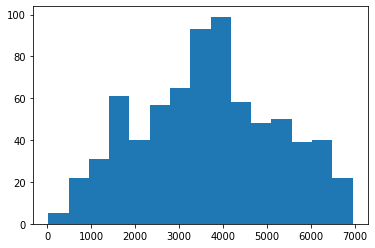

In [30]:
#Checking the data distribution of registered users

plt.hist(df.registered,bins=15)
plt.show()

In [31]:
#Checking quantiles of registered variables in 5 bins

df.registered.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2    2208.6
0.4    3310.2
0.6    3980.4
0.8    5116.4
1.0    6946.0
Name: registered, dtype: float64

In [32]:
# Defining the names of the bins

bins=['very low','low','medium','high','very high']
df['registered_bin']=pd.qcut(df['registered'],q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=bins)

In [33]:
# Checking the spread of data in the bins

df['registered_bin'].value_counts()

very low     146
low          146
medium       146
high         146
very high    146
Name: registered_bin, dtype: int64

In [34]:
# Getting dummy variable for registered_bin variable

registered_bin=pd.get_dummies(df.registered_bin, drop_first=True) #Dropping the first dummy variable
registered_bin.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [35]:
# Concatinating bins to the original dataframe

df=pd.concat([df,registered_bin], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,sat,sun,thurs,tues,wed,registered_bin,low,medium,high,very high
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,1,0,0,0,very low,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,very low,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,1,0,very low,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,1,very low,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,very low,0,0,0,0


# Droping other variables

In [36]:
#Dropping atemp since we have a similar variable temp in the data

df.drop(columns=['atemp'], inplace=True)

#Dropping causal and registered since we can have only one target in the data

df.drop(columns=['casual','registered','registered_bin'], inplace=True)

In [37]:
# Checking the fields in the dataset after data preparation

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Splitting the data into test and train datasets

In [38]:
#loading libraries from sklearn

from sklearn.model_selection import train_test_split

In [39]:
np.random.seed(0)

In [40]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

In [41]:
# Checking the shape of train dataset

df_train.shape

(510, 33)

In [42]:
# Checking the shape of train dataset

df_test.shape

(219, 33)

# Resclaing the feature variables using MinMax scaler

In [43]:
#temp, atemp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [44]:
# Applying fit_transform to normalize temp, atemp, hum and windspeed numerical columns

rescalevar=['temp','hum','windspeed','cnt']
df_train[rescalevar]=scaler.fit_transform(df_train[rescalevar])

In [45]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.135294,0.143137,0.135294,0.139216,0.152941,0.149020,0.201961,0.198039,0.194118,0.200000
std,0.500179,0.151726,0.456092,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.342373,0.350557,0.342373,0.346511,0.360284,0.356457,0.401857,0.398913,0.395908,0.400393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking linearity and corealtion in the train dataset after rescaling and dummy field conversion

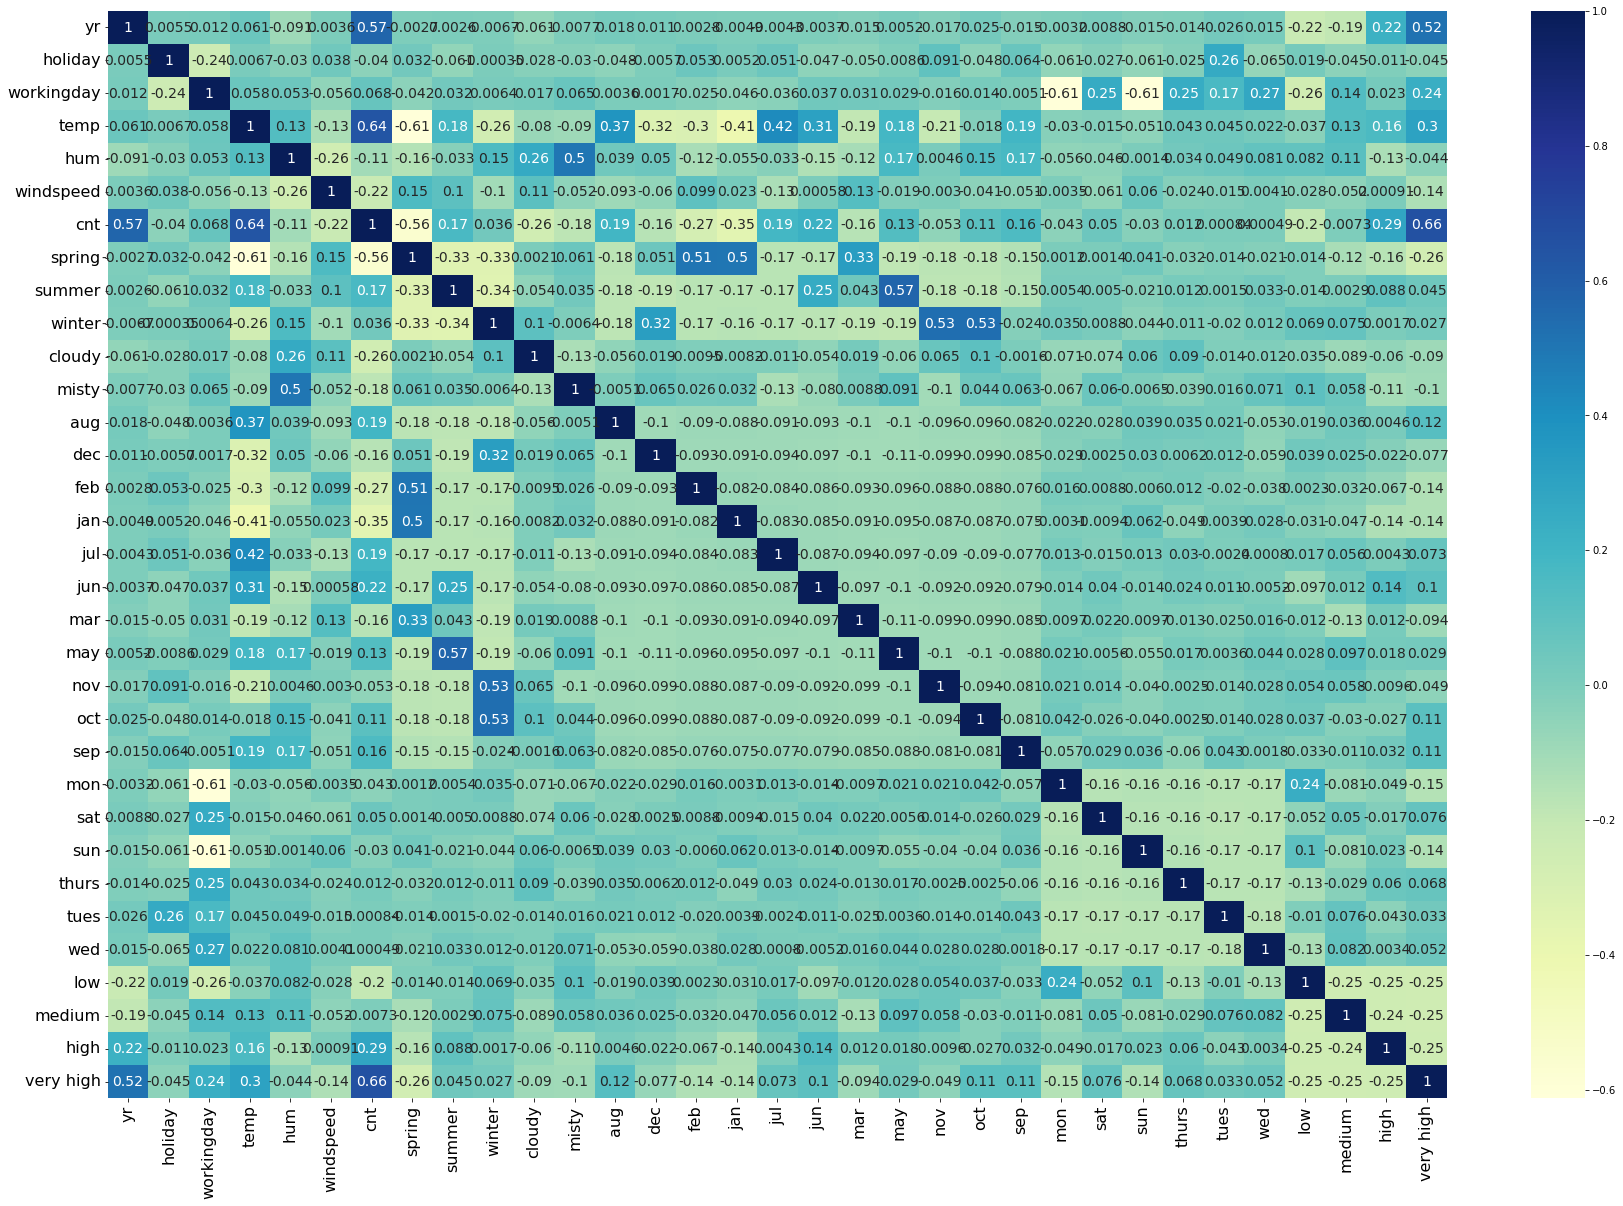

In [46]:
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# Building regression Model

In [47]:
# import statmodels for our MLR

import statsmodels.api as sm

In [48]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt')
X_train=df_train[:]

In [49]:
# Adding a constant to X_train

X_train_lm=sm.add_constant(X_train['temp'])

In [50]:
# Creating a LR object which we will use to fit the line

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
#Checking the summary

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     354.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.56e-60
Time:                        22:13:19   Log-Likelihood:                 176.05
No. Observations:                 510   AIC:                            -348.1
Df Residuals:                     508   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.020      8.443      0.000       0.128       0.206
temp           0.6209      0.033     18.815      0.000       0.556       0.686
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.009
Skew:                           0.160   Prob(JB):                       0.0301
Kurtosis:                       2.523   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

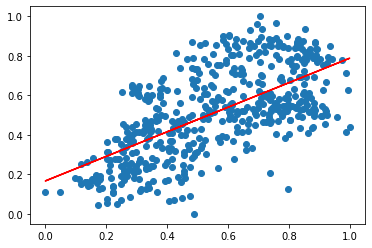

In [52]:
# Plotting our regression line through the target variable

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1668 + 0.6209*X_train_lm.iloc[:, 1], 'r')
plt.show()

# Using RFE to select variables

In [53]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
#removing experimental feature addition
X_train.drop(columns=['low','medium','high','very high'], inplace=True)

In [55]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15) # setting the limit of our feature variables to 15
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [56]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('aug', False, 12),
 ('dec', False, 2),
 ('feb', False, 5),
 ('jan', False, 3),
 ('jul', False, 4),
 ('jun', False, 8),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', True, 1),
 ('thurs', False, 11),
 ('tues', False, 7),
 ('wed', False, 10)]

In [57]:
# Storing variables with significant weights in a variable

rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'misty', 'nov', 'sep', 'mon', 'sun'],
      dtype='object')

In [58]:
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,1


In [59]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1.0,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,1,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,1
204,1.0,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,1,0
182,1.0,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,1


In [60]:
# Creating a LR object which we will use to fit the line.

lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [61]:
#Checking the summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.45e-193
Time:                        22:13:20   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     495   BIC:                            -954.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2204      0.028      7.971      0.000       0.166       0.275
yr             0.2296      0.008     29.083      0.000       0.214       0.245
holiday        0.0097      0.022      0.438      0.662      -0.034       0.053
workingday     0.0766      0.010      7.880      0.000       0.057       0.096
temp           0.5295      0.033     16.061      0.000       0.465       0.594
hum           -0.2223      0.037     -6.038      0.000      -0.295      -0.150
windspeed     -0.1887      0.025     -7.424      0.000      -0.239      -0.139
spring        -0.0500      0.021     -2.420      0.016      -0.091      -0.009
summer         0.0649      0.014      4.788      0.000       0.038       0.091
winter         0.1247      0.017      7.211      0.000       0.091       0.159
cloudy        -0.2053      0.026     -8.040      0.000      -0.255      -0.155
misty         -0.0426      0.011     -4.027      0.000      -0.063      -0.022
nov           -0.0312      0.017     -1.846      0.066      -0.064       0.002
sep            0.0813      0.017      4.709      0.000       0.047       0.115
mon            0.0417      0.012      3.431      0.001       0.018       0.066
sun            0.0924      0.012      7.753      0.000       0.069       0.116
==============================================================================
Omnibus:                       71.028   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.320
Skew:                          -0.724   Prob(JB):                     6.29e-38
Kurtosis:                       5.442   Cond. No.                     5.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the p-values, we can see that we have variables with high p - values or variables which are not significant.

#  Calculating VIF for model 2

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,53.92
13,mon,11.07
14,sun,10.80
6,spring,5.21
3,temp,3.81
8,winter,3.71
1,holiday,2.88
7,summer,2.30
4,hum,2.00
10,misty,1.66


In [63]:
# Dropping monday variable
X_train_rfe.drop(columns='mon', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.45e-193
Time:                        22:13:21   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     495   BIC:                            -954.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2621      0.035      7.445      0.000       0.193       0.331
yr             0.2296      0.008     29.083      0.000       0.214       0.245
holiday       -0.0320      0.028     -1.152      0.250      -0.087       0.023
workingday     0.0349      0.012      2.996      0.003       0.012       0.058
temp           0.5295      0.033     16.061      0.000       0.465       0.594
hum           -0.2223      0.037     -6.038      0.000      -0.295      -0.150
windspeed     -0.1887      0.025     -7.424      0.000      -0.239      -0.139
spring        -0.0500      0.021     -2.420      0.016      -0.091      -0.009
summer         0.0649      0.014      4.788      0.000       0.038       0.091
winter         0.1247      0.017      7.211      0.000       0.091       0.159
cloudy        -0.2053      0.026     -8.040      0.000      -0.255      -0.155
misty         -0.0426      0.011     -4.027      0.000      -0.063      -0.022
nov           -0.0312      0.017     -1.846      0.066      -0.064       0.002
sep            0.0813      0.017      4.709      0.000       0.047       0.115
sun            0.0507      0.015      3.349      0.001       0.021       0.080
==============================================================================
Omnibus:                       71.028   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.320
Skew:                          -0.724   Prob(JB):                     6.29e-38
Kurtosis:                       5.442   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recalculating VIF for model 3

In [64]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.48
3,temp,16.42
2,workingday,5.87
5,windspeed,4.85
6,spring,4.23
8,winter,3.72
7,summer,2.49
10,misty,2.39
0,yr,1.97
13,sun,1.92


 # Model 4: Building the model after dropping sunday.

In [65]:
# Dropping sunday variable
X_train_rfe.drop(columns='sun', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.83e-192
Time:                        22:13:21   Log-Likelihood:                 518.46
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     496   BIC:                            -949.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2908      0.034      8.431      0.000       0.223       0.359
yr             0.2297      0.008     28.802      0.000       0.214       0.245
holiday       -0.0573      0.027     -2.117      0.035      -0.110      -0.004
workingday     0.0096      0.009      1.072      0.284      -0.008       0.027
temp           0.5240      0.033     15.753      0.000       0.459       0.589
hum           -0.2218      0.037     -5.963      0.000      -0.295      -0.149
windspeed     -0.1859      0.026     -7.243      0.000      -0.236      -0.136
spring        -0.0532      0.021     -2.553      0.011      -0.094      -0.012
summer         0.0626      0.014      4.576      0.000       0.036       0.089
winter         0.1207      0.017      6.924      0.000       0.086       0.155
cloudy        -0.1985      0.026     -7.718      0.000      -0.249      -0.148
misty         -0.0413      0.011     -3.871      0.000      -0.062      -0.020
nov           -0.0321      0.017     -1.881      0.061      -0.066       0.001
sep            0.0837      0.017      4.805      0.000       0.049       0.118
==============================================================================
Omnibus:                       66.602   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.441
Skew:                          -0.658   Prob(JB):                     3.59e-38
Kurtosis:                       5.526   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.82
3,temp,16.16
5,windspeed,4.77
6,spring,4.15
8,winter,3.71
2,workingday,3.58
7,summer,2.48
10,misty,2.39
0,yr,1.97
11,nov,1.60


In [67]:
# Dropping sunday variable
X_train_rfe.drop(columns='nov', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.20e-192
Time:                        22:13:21   Log-Likelihood:                 516.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     497   BIC:                            -952.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2836      0.034      8.252      0.000       0.216       0.351
yr             0.2297      0.008     28.729      0.000       0.214       0.245
holiday       -0.0632      0.027     -2.345      0.019      -0.116      -0.010
workingday     0.0092      0.009      1.022      0.307      -0.008       0.027
temp           0.5344      0.033     16.249      0.000       0.470       0.599
hum           -0.2239      0.037     -6.008      0.000      -0.297      -0.151
windspeed     -0.1886      0.026     -7.339      0.000      -0.239      -0.138
spring        -0.0473      0.021     -2.292      0.022      -0.088      -0.007
summer         0.0651      0.014      4.775      0.000       0.038       0.092
winter         0.1139      0.017      6.662      0.000       0.080       0.148
cloudy        -0.1973      0.026     -7.654      0.000      -0.248      -0.147
misty         -0.0391      0.011     -3.679      0.000      -0.060      -0.018
sep            0.0869      0.017      4.997      0.000       0.053       0.121
==============================================================================
Omnibus:                       63.899   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.490
Skew:                          -0.644   Prob(JB):                     2.33e-35
Kurtosis:                       5.418   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the summary, we do not have any variables with p-values greater than 0.05. We can next step of our procedure and drop variables with VIF>5.

In [68]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.51
3,temp,15.91
5,windspeed,4.72
6,spring,4.10
2,workingday,3.58
8,winter,3.36
7,summer,2.47
10,misty,2.34
0,yr,1.97
9,cloudy,1.29


#### Model 6: Building the model after dropping hum.


In [69]:
# Dropping sunday variable
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.91e-186
Time:                        22:13:21   Log-Likelihood:                 498.77
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.030      5.797      0.000       0.116       0.235
yr             0.2351      0.008     28.612      0.000       0.219       0.251
holiday       -0.0614      0.028     -2.203      0.028      -0.116      -0.007
workingday     0.0105      0.009      1.131      0.259      -0.008       0.029
temp           0.4850      0.033     14.721      0.000       0.420       0.550
windspeed     -0.1422      0.025     -5.609      0.000      -0.192      -0.092
spring        -0.0628      0.021     -2.960      0.003      -0.104      -0.021
summer         0.0565      0.014      4.029      0.000       0.029       0.084
winter         0.0917      0.017      5.309      0.000       0.058       0.126
cloudy        -0.2648      0.024    -11.033      0.000      -0.312      -0.218
misty         -0.0773      0.009     -8.772      0.000      -0.095      -0.060
sep            0.0713      0.018      4.007      0.000       0.036       0.106
==============================================================================
Omnibus:                       64.371   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.443
Skew:                          -0.649   Prob(JB):                     1.45e-35
Kurtosis:                       5.422   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recalculating VIF for model 6

In [70]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.99
4,windspeed,4.64
2,workingday,3.56
5,spring,2.22
6,summer,2.01
0,yr,1.96
7,winter,1.77
9,misty,1.58
10,sep,1.20
1,holiday,1.10


At this stage, we have an adjusted R-sqaure values 0.83 which means our model explains 83.2% of the variance in the train data.
Let us try to manually add some significant variables to check if it improves our model.

In [71]:
# listing columns which have been used in lr6

X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep'],
      dtype='object')

June has a co-relation of 0.22 with the count variable. Let's try adding june and recalculating the model.

In [72]:
# Adding sunday variable
X_train_rfe['jun']=X_train['jun']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr7 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.10e-185
Time:                        22:13:21   Log-Likelihood:                 500.09
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     497   BIC:                            -919.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1818      0.031      5.959      0.000       0.122       0.242
yr             0.2356      0.008     28.695      0.000       0.219       0.252
holiday       -0.0597      0.028     -2.146      0.032      -0.114      -0.005
workingday     0.0104      0.009      1.117      0.264      -0.008       0.029
temp           0.4728      0.034     14.002      0.000       0.406       0.539
windspeed     -0.1426      0.025     -5.632      0.000      -0.192      -0.093
spring        -0.0654      0.021     -3.082      0.002      -0.107      -0.024
summer         0.0526      0.014      3.698      0.000       0.025       0.081
winter         0.0906      0.017      5.251      0.000       0.057       0.125
cloudy        -0.2636      0.024    -10.996      0.000      -0.311      -0.216
misty         -0.0764      0.009     -8.661      0.000      -0.094      -0.059
sep            0.0737      0.018      4.136      0.000       0.039       0.109
jun            0.0259      0.016      1.605      0.109      -0.006       0.058
==============================================================================
Omnibus:                       67.274   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.478
Skew:                          -0.664   Prob(JB):                     1.30e-38
Kurtosis:                       5.539   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#The p-value increased after adding june. We should drop it.
X_train_rfe.drop(columns='jun', inplace=True)

Feb has a negative co-relation of 0.22 with the count variable. Let's try adding february and recalculating the model.

### Model 8: Building the model after adding feb.

In [74]:
# Adding jun variable and building the model.
X_train_rfe['feb']=X_train['feb']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr8 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.56e-185
Time:                        22:13:22   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     497   BIC:                            -916.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.030      5.799      0.000       0.116       0.236
yr             0.2351      0.008     28.590      0.000       0.219       0.251
holiday       -0.0620      0.028     -2.221      0.027      -0.117      -0.007
workingday     0.0105      0.009      1.126      0.261      -0.008       0.029
temp           0.4850      0.033     14.709      0.000       0.420       0.550
windspeed     -0.1426      0.025     -5.617      0.000      -0.192      -0.093
spring        -0.0657      0.022     -2.998      0.003      -0.109      -0.023
summer         0.0565      0.014      4.026      0.000       0.029       0.084
winter         0.0917      0.017      5.303      0.000       0.058       0.126
cloudy        -0.2646      0.024    -11.016      0.000      -0.312      -0.217
misty         -0.0773      0.009     -8.763      0.000      -0.095      -0.060
sep            0.0713      0.018      4.005      0.000       0.036       0.106
feb            0.0096      0.018      0.537      0.591      -0.025       0.045
==============================================================================
Omnibus:                       63.463   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.491
Skew:                          -0.637   Prob(JB):                     2.33e-35
Kurtosis:                       5.425   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# The p-value increased after adding feb. We should drop it.
X_train_rfe.drop(columns='feb', inplace=True)

#### Let us add march variable and recalculate the model.

### Model 10: Building the model after adding march.

In [76]:
# Adding jan variable and building the model.
X_train_rfe['mar']=X_train['mar']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.07e-185
Time:                        22:13:22   Log-Likelihood:                 500.78
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1782      0.030      5.889      0.000       0.119       0.238
yr             0.2354      0.008     28.727      0.000       0.219       0.252
holiday       -0.0587      0.028     -2.108      0.035      -0.113      -0.004
workingday     0.0099      0.009      1.064      0.288      -0.008       0.028
temp           0.4834      0.033     14.708      0.000       0.419       0.548
windspeed     -0.1452      0.025     -5.734      0.000      -0.195      -0.095
spring        -0.0713      0.022     -3.307      0.001      -0.114      -0.029
summer         0.0530      0.014      3.755      0.000       0.025       0.081
winter         0.0911      0.017      5.290      0.000       0.057       0.125
cloudy        -0.2656      0.024    -11.099      0.000      -0.313      -0.219
misty         -0.0770      0.009     -8.758      0.000      -0.094      -0.060
sep            0.0711      0.018      4.008      0.000       0.036       0.106
mar            0.0299      0.015      1.984      0.048       0.000       0.059
==============================================================================
Omnibus:                       65.468   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.622
Skew:                          -0.678   Prob(JB):                     2.66e-34
Kurtosis:                       5.332   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In this case the p-value is not very high and see an improvement of 0.1% in the R-squared value. Let's check VIF.

### Recalculating VIF for model 10

In [77]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.99
4,windspeed,4.65
2,workingday,3.56
5,spring,2.42
6,summer,2.04
0,yr,1.96
7,winter,1.77
9,misty,1.58
11,mar,1.29
10,sep,1.20


The VIF is also in control after adding march. Let's try adding wednesday and check the p-values.

## Model 11: Building the model after adding wednesday.

In [78]:
# Adding jan variable and building the model.
X_train_rfe['wed']=X_train['wed']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr11 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.24e-185
Time:                        22:13:22   Log-Likelihood:                 501.93
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     496   BIC:                            -916.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1763      0.030      5.828      0.000       0.117       0.236
yr             0.2355      0.008     28.775      0.000       0.219       0.252
holiday       -0.0587      0.028     -2.111      0.035      -0.113      -0.004
workingday     0.0135      0.010      1.414      0.158      -0.005       0.032
temp           0.4848      0.033     14.763      0.000       0.420       0.549
windspeed     -0.1444      0.025     -5.706      0.000      -0.194      -0.095
spring        -0.0706      0.022     -3.275      0.001      -0.113      -0.028
summer         0.0537      0.014      3.808      0.000       0.026       0.081
winter         0.0920      0.017      5.347      0.000       0.058       0.126
cloudy        -0.2660      0.024    -11.130      0.000      -0.313      -0.219
misty         -0.0763      0.009     -8.677      0.000      -0.094      -0.059
sep            0.0713      0.018      4.025      0.000       0.037       0.106
mar            0.0301      0.015      1.998      0.046       0.001       0.060
wed           -0.0177      0.012     -1.494      0.136      -0.041       0.006
==============================================================================
Omnibus:                       65.310   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.044
Skew:                          -0.679   Prob(JB):                     5.85e-34
Kurtosis:                       5.315   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value of wednesday is within 0.05 and see a further improvement of 0.2% in R squared. Keeping wednesday. Let's check the VIF.
### Recalculating VIF for model 11


In [79]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.99
4,windspeed,4.65
2,workingday,3.81
5,spring,2.42
6,summer,2.04
0,yr,1.96
7,winter,1.77
9,misty,1.58
11,mar,1.29
12,wed,1.27


#### Let us try adding very high - registered flag and recalculate the model
### Model 12: Building the model after adding very high registered variable.


In [80]:
# Adding very-high variable and building the model.
X_train_rfe['very high']=registered_bin['very high']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr14 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.05e-203
Time:                        22:13:22   Log-Likelihood:                 547.83
No. Observations:                 510   AIC:                            -1066.
Df Residuals:                     495   BIC:                            -1002.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.028      7.084      0.000       0.142       0.251
yr             0.1867      0.009     20.820      0.000       0.169       0.204
holiday       -0.0592      0.025     -2.327      0.020      -0.109      -0.009
workingday    -0.0104      0.009     -1.143      0.254      -0.028       0.007
temp           0.4525      0.030     14.977      0.000       0.393       0.512
windspeed     -0.1206      0.023     -5.180      0.000      -0.166      -0.075
spring        -0.0570      0.020     -2.886      0.004      -0.096      -0.018
summer         0.0538      0.013      4.172      0.000       0.028       0.079
winter         0.0889      0.016      5.646      0.000       0.058       0.120
cloudy        -0.2499      0.022    -11.394      0.000      -0.293      -0.207
misty         -0.0655      0.008     -8.065      0.000      -0.081      -0.050
sep            0.0571      0.016      3.512      0.000       0.025       0.089
mar            0.0299      0.014      2.177      0.030       0.003       0.057
wed           -0.0157      0.011     -1.445      0.149      -0.037       0.006
very high      0.1211      0.012      9.880      0.000       0.097       0.145
==============================================================================
Omnibus:                       52.915   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.329
Skew:                          -0.521   Prob(JB):                     1.51e-30
Kurtosis:                       5.319   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recalculating VIF for model 12

In [81]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.04
4,windspeed,4.73
2,workingday,4.08
0,yr,2.80
5,spring,2.53
13,very high,2.17
6,summer,2.05
7,winter,1.77
9,misty,1.61
11,mar,1.29


### VIF of temp is > 5 so dropping very high

In [82]:
X_train_rfe.drop(columns='very high', inplace=True)


In [83]:
# Printing the feature variables used.
#X_train_rfe.drop(columns='const', inplace=True)
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep', 'mar', 'wed'],
      dtype='object')

In [84]:
# Adding the constant

X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
#Building the model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [86]:
# Printing the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.24e-185
Time:                        22:13:23   Log-Likelihood:                 501.93
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     496   BIC:                            -916.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1763      0.030      5.828      0.000       0.117       0.236
yr             0.2355      0.008     28.775      0.000       0.219       0.252
holiday       -0.0587      0.028     -2.111      0.035      -0.113      -0.004
workingday     0.0135      0.010      1.414      0.158      -0.005       0.032
temp           0.4848      0.033     14.763      0.000       0.420       0.549
windspeed     -0.1444      0.025     -5.706      0.000      -0.194      -0.095
spring        -0.0706      0.022     -3.275      0.001      -0.113      -0.028
summer         0.0537      0.014      3.808      0.000       0.026       0.081
winter         0.0920      0.017      5.347      0.000       0.058       0.126
cloudy        -0.2660      0.024    -11.130      0.000      -0.313      -0.219
misty         -0.0763      0.009     -8.677      0.000      -0.094      -0.059
sep            0.0713      0.018      4.025      0.000       0.037       0.106
mar            0.0301      0.015      1.998      0.046       0.001       0.060
wed           -0.0177      0.012     -1.494      0.136      -0.041       0.006
==============================================================================
Omnibus:                       65.310   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.044
Skew:                          -0.679   Prob(JB):                     5.85e-34
Kurtosis:                       5.315   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

Text(0.5, 0, 'Errors')

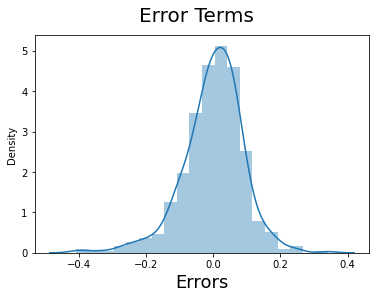

In [87]:
y_train_pred = lm.predict(X_train_rfe)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##  Validating assumptions on Linear regression

### Linear relationship between target and feature variables.
#### As we can see from the scatter plots, temperature has a clear linear relationship with cnt.

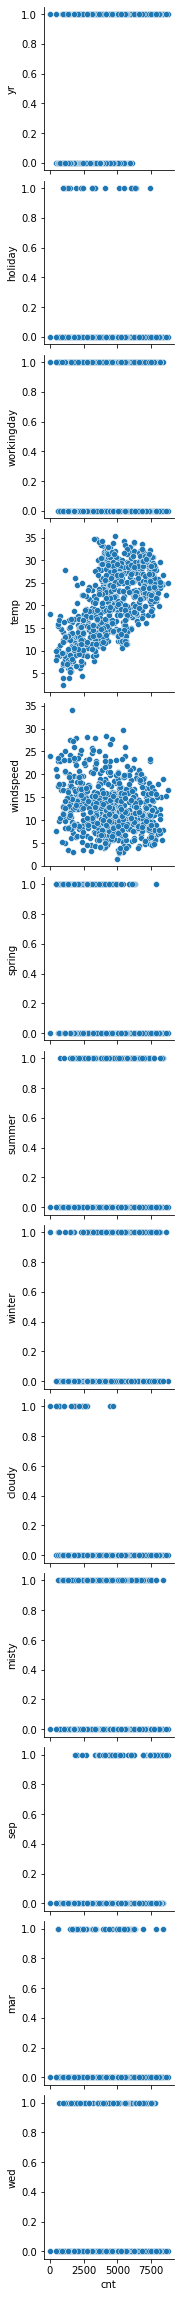

<Figure size 1440x1080 with 0 Axes>

In [88]:
# Pair Plot for numerical variables
X_train_rfe.drop(columns='const', inplace=True)
sns.pairplot(df, y_vars=X_train_rfe.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

As we can see from the scatter plots, temperature has a clear linear relationship with cnt.

###  Residuals must be normally distributed

Text(0.5, 0, 'Errors')

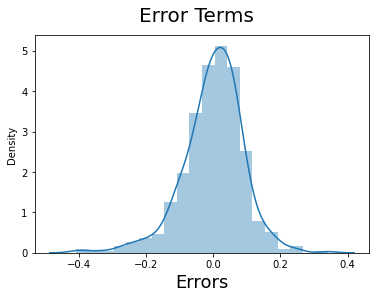

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As we can see from the distribution below, our residuals are normally distributed.

## Making Predictions

In [90]:
#Printing the variables to be scaled

rescalevar

['temp', 'hum', 'windspeed', 'cnt']

In [91]:
#Applying scaling on test data

df_test[rescalevar]=scaler.fit_transform(df_test[rescalevar])

In [92]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,0.539449,0.491694,0.417532,0.493500,0.251142,0.246575,0.223744,...,0.164384,0.141553,0.164384,0.146119,0.123288,0.123288,0.196347,0.205479,0.210046,0.200913
std,0.499633,0.198967,0.483873,0.249527,0.202969,0.198978,0.248161,0.434663,0.432005,0.417707,...,0.371472,0.349389,0.371472,0.354034,0.329520,0.329520,0.398144,0.404977,0.408274,0.401601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327677,0.347643,0.275323,0.330281,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.555134,0.477380,0.397141,0.488651,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.749763,0.632641,0.536922,0.692159,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

In [94]:
#Printing feature variables

X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep', 'mar', 'wed'],
      dtype='object')

In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
# Making predictions

y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

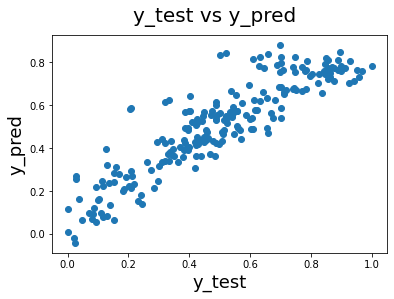

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

In [98]:
from sklearn.metrics import r2_score


In [99]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.008178709185211666
0.012118898539680793


#### We have a Mean Squared Error close to 0 on the training dataset, meaning our model is able to correctly predict all variances in the data.
#### On the test validation dataset, MSE is 0.01 also close to zero, meaning our model is able perform similarly on unknown data sets too.

In [100]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8358119404340829
0.8023101918451214


 ### We have a R-squared value of 83.58 % on train data and 80.23% on test data.